# Handwriting Recognition

**The core purpose of this code is to demonstrate the use of the K-means clustering algorithm for image recognition and classification. It uses the Digits dataset from sklearn to train a K-means clustering model on handwritten digit images.**

# Clustering 
**Clustering is the most well-known unsupervised learning technique. It finds structure in unlabeled data by identifying similar groups, or clusters.**
**The goal of clustering is to separate data so that data similar to one another are in the same group, while data different from one another are in different groups. So two questions arise:**

* How many groups do we choose?
* How do we define similarity?

# K-Means Clustering
**K-Means is the most popular and well-known clustering algorithm, and it tries to address these two questions.**

* The “K” refers to the number of clusters (groups) we expect to find in a dataset.
* The “Means” refers to the average distance of data to each cluster center, also known as the centroid, which we are trying to minimize

**Steps:**
* Load the Dataset
* Display Dataset information
* Visualize some sample images
* Perform K-means clustering
* Visualize cluster center image
* Generate a new Sample for prediction

# Load the Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

digits = datasets.load_digits()

# Display Dataset information

In [2]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

# Visualize some sample images

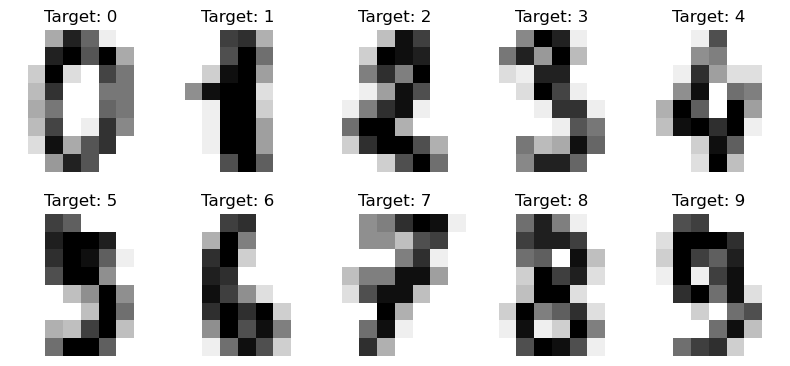

In [3]:
fig, axes = plt.subplots(2, 5, figsize=(8, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r)
    ax.set_title(f"Target: {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Perform K-means clustering

In [4]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(digits.data)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

# Visualize cluster center image

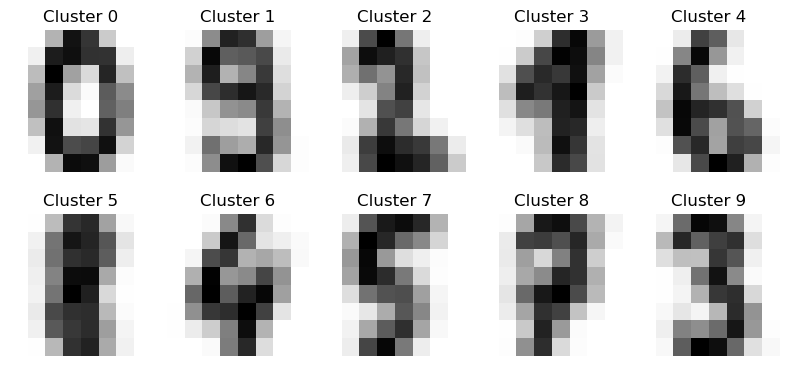

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(8, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(kmeans.cluster_centers_[i].reshape(8, 8), cmap=plt.cm.binary)
    ax.set_title(f"Cluster {i}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Generate a new Sample for prediction

In [6]:
new_samples = np.array([
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
])

# Pad the new samples with zeros if necessary
desired_num_features = 64
num_existing_features = new_samples.shape[1]
if num_existing_features < desired_num_features:
    num_additional_features = desired_num_features - num_existing_features
    new_samples = np.pad(new_samples, ((0, 0), (0, num_additional_features)), mode='constant')

# Predict the labels for new samples
new_labels = kmeans.predict(new_samples)

# Map cluster labels to corresponding digits
label_mapping = {0: 0, 1: 9, 2: 2, 3: 1, 4: 6, 5: 8, 6: 4, 7: 5, 8: 7, 9: 3}
mapped_labels = [label_mapping[label] for label in new_labels]

# Display the predicted digits
print("Predicted digits:", mapped_labels)

Predicted digits: [1, 1, 1, 1]
